<a href="https://colab.research.google.com/github/Ian-Ibrahim/SU-Machine-learning-1222785/blob/main/ML_10th_July_Multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from datasets import load_dataset

import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Embedding,LSTM,Dense,GRU
import matplotlib.pyplot as plt

In [ ]:
data=load_dataset('masakhane/masakhanews' , 'swa')
texts=data['train']['headline']+data['test']['headline']+data['validation']['headline']
labels=data['train']['label']+data['test']['label']+data['validation']['label']
print(len(texts))
print(len(labels))

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset masakhanews downloaded and prepared to /root/.cache/huggingface/datasets/masakhane___masakhanews/swa/1.0.0/c60334474cec1d13c0c3018e138cd8b60bc6443fa5e25258d65d990b2498403f. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

2371
2371


In [ ]:
print(texts[:5])

['Tetesi za soka Ulaya Jumatatu 26.04.2021: Varane, Camara, Nagelsmann, Willock, Azpilicueta', 'Je chanjo ya corona ni salama?', 'Matokeo ya uchaguzi Marekani 2020: Donald Trump amfuta kazi Waziri wa Ulinzi Mark Esper', 'Je wajua mwanamke na mwanaume hawapaswi kufanya mazoezi pamoja?', 'Watoto waliolazimika kuwa kimya kuhusu baba zao wakutana na maaskofu jijini Paris']


In [ ]:
training_portion=00.8
train_size=int(len(texts)*training_portion)
train_size

1896

In [ ]:
train_texts=texts[0:train_size]
train_labels=labels[0:train_size]

val_texts=texts[train_size:]
val_labels=labels[train_size:]

print(len(train_texts),len(val_texts))

1896 475


In [ ]:
train_labels=np.array(train_labels)
val_labels=np.array(val_labels)

In [ ]:
vocab_size=10000
tokenizer= Tokenizer(num_words=vocab_size,oov_token='<00V>') #UNK,PAD,?
tokenizer.fit_on_texts(train_texts)
word_index=tokenizer.word_index

In [ ]:
max_len=200
padding_type='post'
trunc_type='post'

In [ ]:
train_seq=tokenizer.texts_to_sequences(train_texts)
train_seq=pad_sequences(train_seq,maxlen=max_len,padding=padding_type,truncating=trunc_type)

val_seq=tokenizer.texts_to_sequences(val_texts)
val_seq=pad_sequences(val_seq,maxlen=max_len,padding=padding_type,truncating=trunc_type)

print(train_seq.shape)
print(train_labels.shape)

(1896, 200)
(1896,)


In [ ]:
print(val_seq.shape)
print(val_labels.shape)

(475, 200)
(475,)


In [ ]:
print(set(train_labels))
print(len(set(train_labels)))

{0, 1, 2, 3, 4, 5, 6}
7


In [ ]:
# embedding - Bi-LSTM- dense-dense
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(10000,64),#10000 is size of input and is the size of the embedding layer usually multiples of four
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(len(set(train_labels)),activation='softmax')#tanh,softmax
])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          640000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 7)                 455       
                                                                 
Total params: 714,759
Trainable params: 714,759
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
# momentum is inbuilt in the adam optimizer
# if working with binary use binary_crossentropy

In [ ]:
hist=model.fit(train_seq,train_labels,epochs=20,validation_data=(val_seq,val_labels),verbose=2)

Epoch 1/20
60/60 - 39s - loss: 1.7763 - accuracy: 0.3064 - val_loss: 1.7041 - val_accuracy: 0.2842 - 39s/epoch - 645ms/step
Epoch 2/20
60/60 - 32s - loss: 1.2669 - accuracy: 0.5380 - val_loss: 1.3126 - val_accuracy: 0.4821 - 32s/epoch - 533ms/step
Epoch 3/20
60/60 - 31s - loss: 0.8287 - accuracy: 0.6909 - val_loss: 1.3199 - val_accuracy: 0.5095 - 31s/epoch - 509ms/step
Epoch 4/20
60/60 - 30s - loss: 0.5158 - accuracy: 0.8154 - val_loss: 1.5411 - val_accuracy: 0.5326 - 30s/epoch - 492ms/step
Epoch 5/20
60/60 - 18s - loss: 0.3072 - accuracy: 0.9103 - val_loss: 1.8182 - val_accuracy: 0.5726 - 18s/epoch - 298ms/step
Epoch 6/20
60/60 - 16s - loss: 0.1983 - accuracy: 0.9467 - val_loss: 2.0163 - val_accuracy: 0.5768 - 16s/epoch - 270ms/step
Epoch 7/20
60/60 - 18s - loss: 0.1061 - accuracy: 0.9742 - val_loss: 2.3064 - val_accuracy: 0.5768 - 18s/epoch - 306ms/step
Epoch 8/20
60/60 - 16s - loss: 0.0471 - accuracy: 0.9926 - val_loss: 2.5490 - val_accuracy: 0.5895 - 16s/epoch - 271ms/step
Epoch 9/

In [ ]:
# NWP-nexts word prediction
# lstm relies on past content to help with its future prediction
# bidirectional uses the same thing but uses the context from both scenarioes(past and future) for prediction


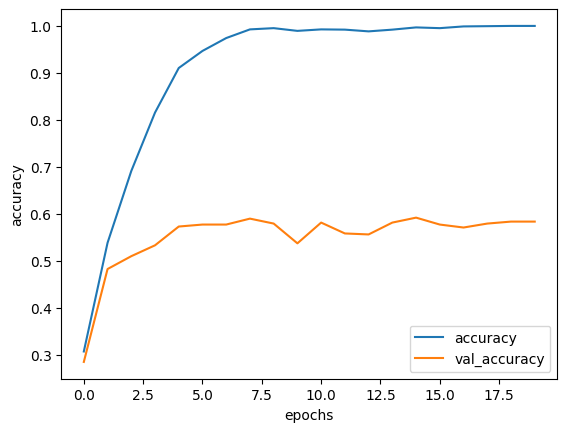

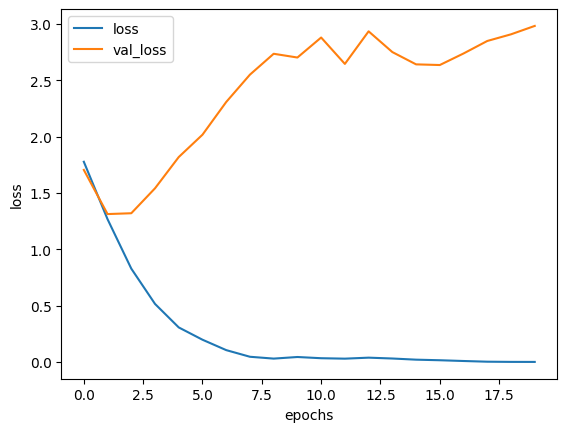

In [ ]:
def plot(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot(hist,'accuracy')
plot(hist,'loss')

In [ ]:
model.save('b-122785-mclass.h5')


In [ ]:
# save tok
import pickle

with open('tok.pickle','wb') as handle:
  pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)